<a href="https://colab.research.google.com/github/Jenniferduong20012004/JennyLearningAI/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

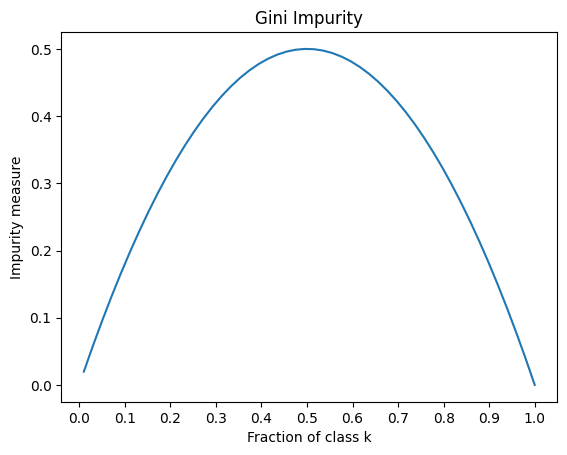

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
x = np.linspace (0.01,1)
y = 1 - np.power(x,2)- np.power (1-x, 2)
plt.plot (x,y)
plt.title ('Gini Impurity')
plt.xlabel ("Fraction of class k")
plt.ylabel ('Impurity measure')
plt.xticks (np.arange (0,1.1,0.1))
plt.show()

In [12]:
dataset = [1,2,4,6,7]

In [13]:
def frequency (dataset, i):
  frequen =0
  for data in dataset:
    if data is i:
      frequen +=1
  return frequen

In [14]:
def compute_gini (dataset):
  psum = 0
  num_element = len (dataset)
  for i in dataset:
    psum = psum + np.power(frequency(dataset,i)/num_element,2)
    #remove duplicate
  return 1 - psum

In [15]:
compute_gini(dataset)

0.7999999999999999

In [16]:
import pandas as pd

In [20]:
attribute_names = ['love_math', 'love_art', 'love_english']
class_name = 'love_ai'
data = {
    'love_math': ['yes', 'yes','no','no','yes','yes','no'],
    'love_art': ['yes', 'no', 'yes','yes','yes','no', 'no'],
    'love_english':['no', 'no','yes','yes','yes','yes','yes'],
    'love_ai': ['no','no','yes','yes','yes', 'no', 'no']
}
df = pd.DataFrame (data, columns = data.keys())
print (df)

  love_math love_art love_english love_ai
0       yes      yes           no      no
1       yes       no           no      no
2        no      yes          yes     yes
3        no      yes          yes     yes
4       yes      yes          yes     yes
5       yes       no          yes      no
6        no       no          yes      no


In [23]:
class_value_counts = df[class_name].value_counts()
print (class_value_counts)

no     4
yes    3
Name: love_ai, dtype: int64


In [24]:
def gini_impurity (class_value_counts):
  n = class_value_counts.sum()
  psum =0
  for key in class_value_counts.keys():
    psum = psum + np.power (class_value_counts[key]/n,2)
  return 1 - psum

In [25]:
gini_impurity (class_value_counts)

0.48979591836734704

In [34]:
def compute_gini_with_give_condition(attribute_name):
  attribute_value = df[attribute_name].value_counts()
  get = df.shape[0]
  gini_total =0
  for key in attribute_value.keys():
    df_k = df[class_name][df[attribute_name]== key].value_counts()
    n_k = attribute_value [key]
    gini_total = gini_total + (n_k/get)*gini_impurity (df_k)
  return gini_total

In [37]:
a =compute_gini_with_give_condition("love_art")
print (a)

0.21428571428571427
